In [1]:
""" 
SOMMAIRE.

- recupérer les données à partir de la base de données sql : top_gun_data_1.db
- decliner les données par tables : aeronefs, composants, degradations et vols.
- renommer certaines colonnes pour faciliter les jointures au besoin.
- recuprer la date de mise en service de chque avion et l'intégrer à la table des vols.
- calculer les heures de vols cumulées et les stocker des la colonne 'cumulative_hours'
- afficher les hsitogrammes des variables numriques de la table
- affichier la matrice de corrélation des variables numériques.
- recuprer la base de données pivotées realisée par Guillaume L.

"""

" \nSOMMAIRE.\n\n- recupérer les données à partir de la base de données sql : top_gun_data_1.db\n- decliner les données par tables : aeronefs, composants, degradations et vols.\n- renommer certaines colonnes pour faciliter les jointures au besoin.\n- recuprer la date de mise en service de chque avion et l'intégrer à la table des vols.\n- calculer les heures de vols cumulées et les stocker des la colonne 'cumulative_hours'\n- afficher les hsitogrammes des variables numriques de la table\n- affichier la matrice de corrélation des variables numériques.\n- recuprer la base de données pivotées realisée par Guillaume L.\n\n"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sqlite3
from datetime import date
from sklearn.model_selection import GridSearchCV

In [3]:
conn = db_user = 'Top_gun'
db_password = 'zg6N&284Bb<w'
db_host = '212.227.48.180'
db_port = '3306'
db_name = 'Top_gun'
engine = create_engine(f'mysql+mysqlconnector://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')



In [4]:
df_aeronefs = pd.read_sql_query('select * from aeronefs', conn)
df_composants = pd.read_sql_query('select * from composants', conn)
df_degradations = pd.read_sql_query('select * from degradations', conn)
df_logs_vols = pd.read_sql_query('select * from logs_vols', conn)

In [5]:
df_pivot = pd.read_csv('/Users/um/Desktop/Wild Code School/Top_gun/Datasets/pivot_df.csv')

In [6]:
df_pivot.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df_pivot

,aero,etat_voyant,categorie_0,categorie_1,categorie_10,categorie_11,categorie_12,categorie_13,categorie_14,categorie_15,...,usure_40,usure_41,usure_42,usure_43,usure_44,usure_5,usure_6,usure_7,usure_8,usure_9
0,A320_1884,0,2,2,2,2,2,2,2,1,...,30.0,33.0,62.0,23.0,45.0,21.0,42.0,28.0,33.0,15.0
1,A320_1930,2,2,2,2,2,2,2,2,1,...,41.0,71.0,92.0,18.0,46.0,52.0,18.0,18.0,23.0,23.0
2,A320_2237,0,2,2,2,2,2,2,2,1,...,60.0,38.0,42.0,57.0,47.0,62.0,47.0,11.0,21.0,56.0
3,A320_2497,1,2,2,2,2,2,2,2,1,...,28.0,19.0,77.0,46.0,28.0,31.0,22.0,59.0,54.0,30.0
4,A320_2562,0,2,2,2,2,2,2,2,1,...,20.0,69.0,58.0,28.0,22.0,37.0,15.0,60.0,35.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,E175_4558,0,2,2,2,2,2,2,2,1,...,36.0,58.0,41.0,37.0,44.0,48.0,64.0,50.0,27.0,14.0
226,E175_5414,0,2,2,2,2,2,2,2,1,...,25.0,42.0,92.0,14.0,66.0,56.0,22.0,55.0,41.0,27.0
227,E175_5586,0,2,2,2,2,2,2,2,1,...,20.0,8.0,91.0,38.0,36.0,65.0,10.0,16.0,11.0,57.0
228,E175_6729,1,2,2,2,2,2,2,2,1,...,29.0,52.0,68.0,22.0,46.0,51.0,31.0,49.0,41.0,42.0


In [8]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 92 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   aero          230 non-null    object 
 1   etat_voyant   230 non-null    int64  
 2   categorie_0   230 non-null    int64  
 3   categorie_1   230 non-null    int64  
 4   categorie_10  230 non-null    int64  
 5   categorie_11  230 non-null    int64  
 6   categorie_12  230 non-null    int64  
 7   categorie_13  230 non-null    int64  
 8   categorie_14  230 non-null    int64  
 9   categorie_15  230 non-null    int64  
 10  categorie_16  230 non-null    int64  
 11  categorie_17  230 non-null    int64  
 12  categorie_18  230 non-null    int64  
 13  categorie_19  230 non-null    int64  
 14  categorie_2   230 non-null    int64  
 15  categorie_20  230 non-null    int64  
 16  categorie_21  230 non-null    int64  
 17  categorie_22  230 non-null    int64  
 18  categorie_23  230 non-null    

In [9]:
df_logs_vols.head(5)

,ref_vol,aero_linked,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²
0,V07679725,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116
1,V02564879,B747_3165,2024-06-02,5.1,0,0.9,950.6,4.558
2,V07933973,B757_2518,2024-06-02,7.7,3,-6.2,975.5,4.587
3,V02230187,A340_1047,2024-06-02,6.1,1,-25.3,945.1,3.288
4,V09071213,B757_6806,2024-06-02,4.5,0,11.1,931.3,2.817


In [10]:
df_logs_vols.rename(
    columns = {
        'aero_linked': 'aero'
    },
    inplace=True
)

In [11]:
df_logs_vols.head(5)

,ref_vol,aero,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²
0,V07679725,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116
1,V02564879,B747_3165,2024-06-02,5.1,0,0.9,950.6,4.558
2,V07933973,B757_2518,2024-06-02,7.7,3,-6.2,975.5,4.587
3,V02230187,A340_1047,2024-06-02,6.1,1,-25.3,945.1,3.288
4,V09071213,B757_6806,2024-06-02,4.5,0,11.1,931.3,2.817


In [12]:
df_logs_vols[df_logs_vols['aero'] == 'B767_4924']

,ref_vol,aero,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²
0,V07679725,B767_4924,2024-06-02,7.0,0,-5.7,930.6,3.116
126,V02682834,B767_4924,2024-06-03,3.9,0,-0.2,1032.1,1.729
395,V08375145,B767_4924,2024-06-05,7.3,0,-3.5,1023.0,0.450
846,V00790410,B767_4924,2024-06-10,4.1,0,5.2,877.6,2.996
1072,V04434956,B767_4924,2024-06-12,5.5,0,13.4,1025.9,3.029
1340,V05696480,B767_4924,2024-06-16,3.5,0,-9.8,1010.1,1.460
1540,V07812472,B767_4924,2024-06-18,1.7,0,17.4,936.2,0.984
1803,V07441447,B767_4924,2024-06-20,7.3,0,-7.4,959.6,2.136
1926,V05119232,B767_4924,2024-06-22,8.0,0,15.7,944.9,0.155
2051,V02314681,B767_4924,2024-06-23,1.9,1,30.6,968.1,3.341


In [13]:
"""

Je recupère les valeurs extrêmes subies par chaque aeronefs pendants les vols.
Je recupere les heures de vols cumulées pour chaque vols.
Je les insère dans la table df_pivot


"""

time_min = {}
time_max = {}
temp_min = {}
temp_max = {}
pressure_min = {}
pressure_max = {}
vibrations_min = {}
vibrations_max = {}

for aero in df_logs_vols['aero'].unique():
    df_aero = df_logs_vols[df_logs_vols['aero'] == aero]
    time_min[aero] = df_aero['time_en_air'].min()
    time_max[aero] = df_aero['time_en_air'].max()
    temp_min[aero] = df_aero['temp en °C'].min()
    temp_max[aero] = df_aero['temp en °C'].max()
    pressure_min[aero] = df_aero['pressure en hPa'].min()
    pressure_max[aero] = df_aero['pressure en hPa'].max()
    vibrations_min[aero] = df_aero['vibrations en m/s²'].min()
    vibrations_max[aero] = df_aero['vibrations en m/s²'].max()

In [14]:
time_cumul = {}
for aero in df_logs_vols['aero'].unique():
    df_aero = df_logs_vols[df_logs_vols['aero'] == aero]
    time_cumul[aero] = df_aero['time_en_air'].sum()

In [15]:
df_pivot['time_en_air_min']= df_pivot['aero'].map(time_min)
df_pivot['time_en_air_max']= df_pivot['aero'].map(time_max)
df_pivot['temp_en_°C_min']= df_pivot['aero'].map(temp_min)
df_pivot['temp_en_°C_max']= df_pivot['aero'].map(temp_max)
df_pivot['pressure_en_hPa_min']= df_pivot['aero'].map(pressure_min)
df_pivot['pressure_en_hPa_max']= df_pivot['aero'].map(pressure_max)
df_pivot['vibrations_en_m/s²_min']= df_pivot['aero'].map(vibrations_min)
df_pivot['vibrations_en_m/s²_max']= df_pivot['aero'].map(vibrations_max)
df_pivot['time_en_air_cumul'] = df_pivot['aero'].map(time_cumul)

In [16]:
df_pivot

,aero,etat_voyant,categorie_0,categorie_1,categorie_10,categorie_11,categorie_12,categorie_13,categorie_14,categorie_15,...,usure_9,time_en_air_min,time_en_air_max,temp_en_°C_min,temp_en_°C_max,pressure_en_hPa_min,pressure_en_hPa_max,vibrations_en_m/s²_min,vibrations_en_m/s²_max,time_en_air_cumul
0,A320_1884,0,2,2,2,2,2,2,2,1,...,15.0,0.6,10.1,-24.3,18.3,872.1,1090.2,0.161,3.525,45.6
1,A320_1930,2,2,2,2,2,2,2,2,1,...,23.0,1.5,10.4,-11.7,19.3,890.2,1012.6,0.126,4.190,75.0
2,A320_2237,0,2,2,2,2,2,2,2,1,...,56.0,2.5,7.5,-8.9,5.0,877.1,992.6,1.052,4.747,27.8
3,A320_2497,1,2,2,2,2,2,2,2,1,...,30.0,1.2,10.1,-11.3,17.6,885.7,1015.6,0.124,4.703,48.7
4,A320_2562,0,2,2,2,2,2,2,2,1,...,64.0,4.5,7.9,-13.2,16.4,913.2,1071.7,0.193,4.936,55.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,E175_4558,0,2,2,2,2,2,2,2,1,...,14.0,0.6,7.9,-13.1,10.7,867.8,1062.1,2.089,4.968,37.9
226,E175_5414,0,2,2,2,2,2,2,2,1,...,27.0,2.2,9.3,-15.6,16.7,865.0,1031.4,0.634,4.759,61.2
227,E175_5586,0,2,2,2,2,2,2,2,1,...,57.0,0.6,7.7,-9.6,14.1,839.9,1062.7,0.074,4.959,52.2
228,E175_6729,1,2,2,2,2,2,2,2,1,...,42.0,2.9,9.2,-17.3,11.9,901.3,988.5,0.069,4.930,53.4


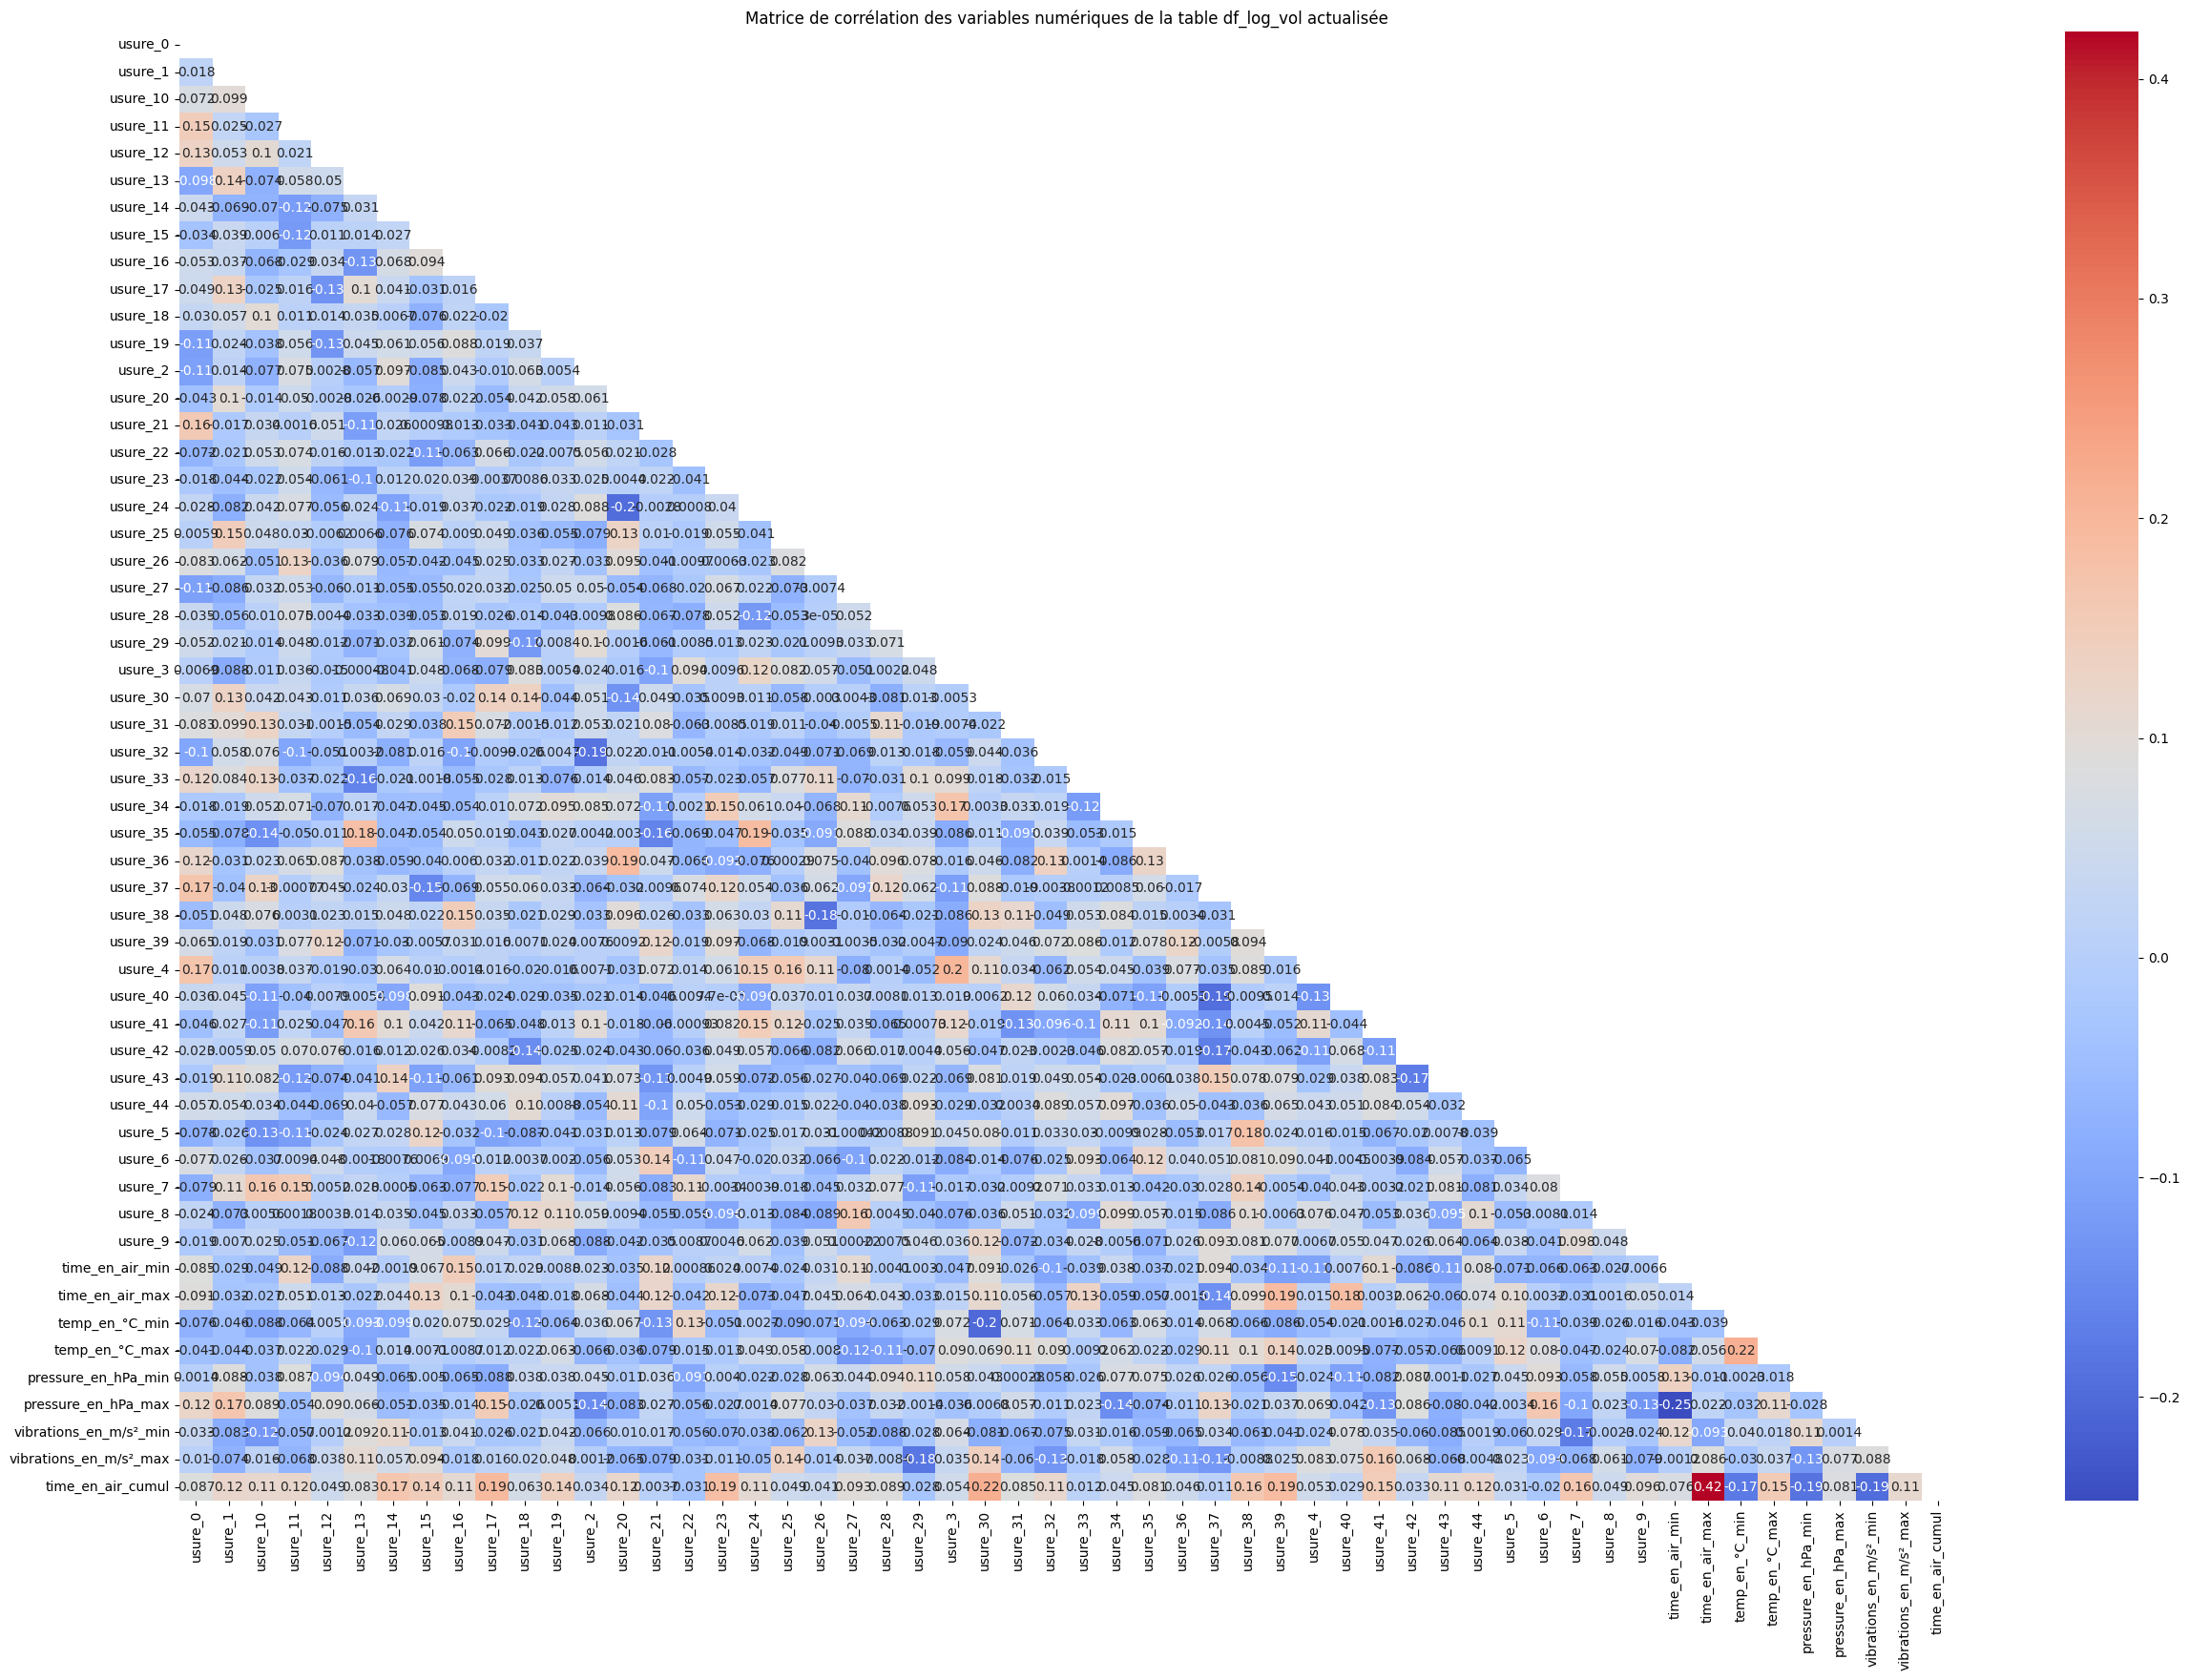

In [17]:
plt.figure(figsize=(30,20))

mumeric_columns = df_pivot.select_dtypes(include=['float']).columns
matrix = df_pivot[mumeric_columns].corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, cmap='coolwarm', mask = mask)
plt.title('Matrice de corrélation des variables numériques de la table df_log_vol actualisée')
plt.show()

# ML logistic regression

In [18]:
""" rajouter les caractéristiques des vols """


' rajouter les caractéristiques des vols '

In [19]:
X = df_pivot.drop(columns =['etat_voyant'])
y = df_pivot['etat_voyant']

In [20]:
""" 
preparation du jeu de données pour le pipeline, separation des variables en fonction de leurs catégories.
On encode les variables catégorielles avec OneHotEncoder, les variables numériques avec StandardScaler.
"""
numerics = X.select_dtypes(include = ['number']).columns

In [21]:
""" 
separation du jeu de données en jeu d'entrainement et de test

"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
""" encodage et standardisation des données """

preprocessor = ColumnTransformer(
    transformers = [ 
        ('num', StandardScaler(), numerics)
                    ]
)

pipeline = Pipeline(steps =[
        ('preprocessor', preprocessor),
         ('classifier', LogisticRegression())
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['categorie_0', 'categorie_1', 'categorie_10', 'categorie_11',
       'categorie_12', 'categorie_13', 'categorie_14', 'categorie_15',
       'categorie_16', 'categorie_17', 'categorie_18', 'categorie_19',
       'categorie_2', 'categorie_20', 'categorie_21', 'categorie_22',
       'categorie_23', 'ca...
       'usure_35', 'usure_36', 'usure_37', 'usure_38', 'usure_39', 'usure_4',
       'usure_40', 'usure_41', 'usure_42', 'usure_43', 'usure_44', 'usure_5',
       'usure_6', 'usure_7', 'usure_8', 'usure_9', 'time_en_air_min',
       'time_en_air_max', 'temp_en_°C_min', 'temp_en_°C_max',
       'pressure_en_hPa_min', 'pressure_en_hPa_max', 'vibrations_en_m/s²_min',
       'vibrations_en_m/s²_max', 'time_en_air_cumul'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [23]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['categorie_0', 'categorie_1', 'categorie_10', 'categorie_11',
       'categorie_12', 'categorie_13', 'categorie_14', 'categorie_15',
       'categorie_16', 'categorie_17', 'categorie_18', 'categorie_19',
       'categorie_2', 'categorie_20', 'categorie_21', 'categorie_22',
       'categorie_23', 'ca...
       'usure_35', 'usure_36', 'usure_37', 'usure_38', 'usure_39', 'usure_4',
       'usure_40', 'usure_41', 'usure_42', 'usure_43', 'usure_44', 'usure_5',
       'usure_6', 'usure_7', 'usure_8', 'usure_9', 'time_en_air_min',
       'time_en_air_max', 'temp_en_°C_min', 'temp_en_°C_max',
       'pressure_en_hPa_min', 'pressure_en_hPa_max', 'vibrations_en_m/s²_min',
       'vibrations_en_m/s²_max', 'time_en_air_cumul'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [24]:
y_pred = pipeline.predict(X_test)

# scores

In [25]:
print('train score of logistic regression is :', pipeline.score(X_train, y_train))
print('test score of logistic regression is : ', pipeline.score(X_test, y_test))

train score of logistic regression is : 0.8858695652173914
test score of logistic regression is :  0.6739130434782609


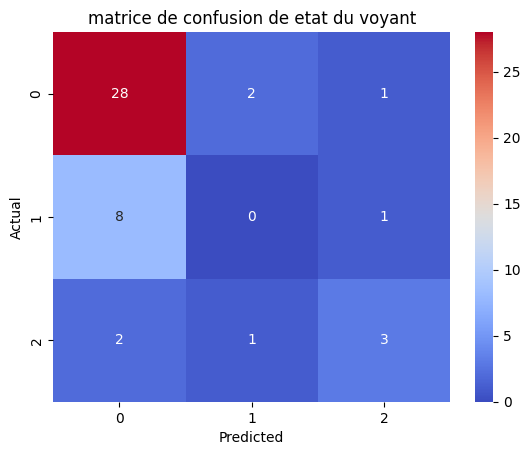

In [26]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('matrice de confusion de etat du voyant')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Ml Random forest classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [28]:
preprocessor = ColumnTransformer(
    transformers = [ 
        ('num', StandardScaler(), numerics)
                    ]
)

pipeline = Pipeline(steps =[
        ('preprocessor', preprocessor),
         ('classifier', RandomForestClassifier())
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['categorie_0', 'categorie_1', 'categorie_10', 'categorie_11',
       'categorie_12', 'categorie_13', 'categorie_14', 'categorie_15',
       'categorie_16', 'categorie_17', 'categorie_18', 'categorie_19',
       'categorie_2', 'categorie_20', 'categorie_21', 'categorie_22',
       'categorie_23', 'ca...
       'usure_40', 'usure_41', 'usure_42', 'usure_43', 'usure_44', 'usure_5',
       'usure_6', 'usure_7', 'usure_8', 'usure_9', 'time_en_air_min',
       'time_en_air_max', 'temp_en_°C_min', 'temp_en_°C_max',
       'pressure_en_hPa_min', 'pressure_en_hPa_max', 'vibrations_en_m/s²_min',
       'vibrations_en_m/s²_max', 'time_en_air_cumul'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [29]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [30]:
print('train score of Randrom forest classifier is :', pipeline.score(X_train, y_train))
print('test score of Randrom forest classifier  : ', pipeline.score(X_test, y_test))

train score of Randrom forest classifier is : 1.0
test score of Randrom forest classifier  :  0.7391304347826086


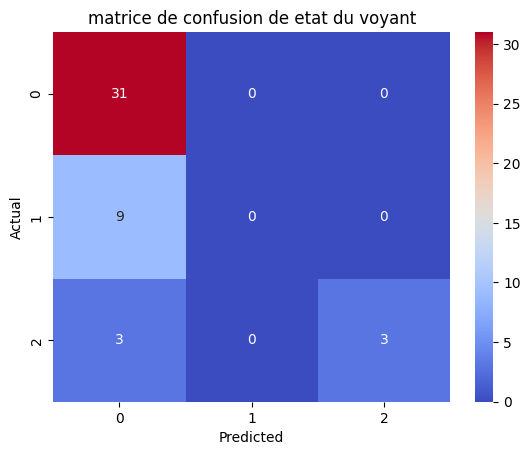

In [31]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='d')
plt.title('matrice de confusion de etat du voyant')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()